**Задание**

**Цель:**

Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.

**Описание задания:**

В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

**Этапы работы**:


Сгенерируйте данные с помощью кода:

from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:

cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

Используйте статистические методы для отбора признаков:

a) Выберите признаки на основе матрицы корреляции.

b) Отсеките низковариативные признаки (VarianceThreshold).

c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

Осуществите отбор признаков на основе дисперсионного анализа:

a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif ([SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)( f_classif, k=5)).

b) Повторите п. 2 на отобранных признаках.

Отбор с использованием моделей:

a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию ( [SelectFromModel ](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)). Используйте L1 регуляризацию.

b) Реализуйте отбор признаков с помощью модели [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) и встроенного атрибута feature_impotance.

c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

Перебор признаков:

a) [SequentialFeatureSelector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html).

b) Повторите п. 2 на отобранных признаках.

Сформулируйте выводы по проделанной работе:
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

Для получения зачета по этому домашнему заданию минимально должны быть:
сгенерированы данные;

использовано хотя бы три метода для отбора признаков;

выведена средняя точность модели на каждом множестве отобранных признаков.

Результат:

Получены знания по основным методам отбора признаков.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector
%matplotlib inline

Сгенерируйте данные с помощью кода:

from sklearn.datasets import make_classification

x_data_generated, y_data_generated = make_classification(scale=1)

In [ ]:

x_data_generated, y_data_generated = make_classification(scale=1)

Постройте модель логистической регрессии и оцените среднюю точность.

Для этого используйте следующий код: 

cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

In [ ]:

cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring="accuracy").mean()

0.76

Используйте статистические методы для отбора признаков:

a) Выберите признаки на основе матрицы корреляции.

b) Отсеките низковариативные признаки (VarianceThreshold).

c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [ ]:
print(x_data_generated.shape)
print(y_data_generated.shape)

(100, 20)
(100,)


In [ ]:
X = np.column_stack((x_data_generated, y_data_generated))
X.shape

(100, 21)

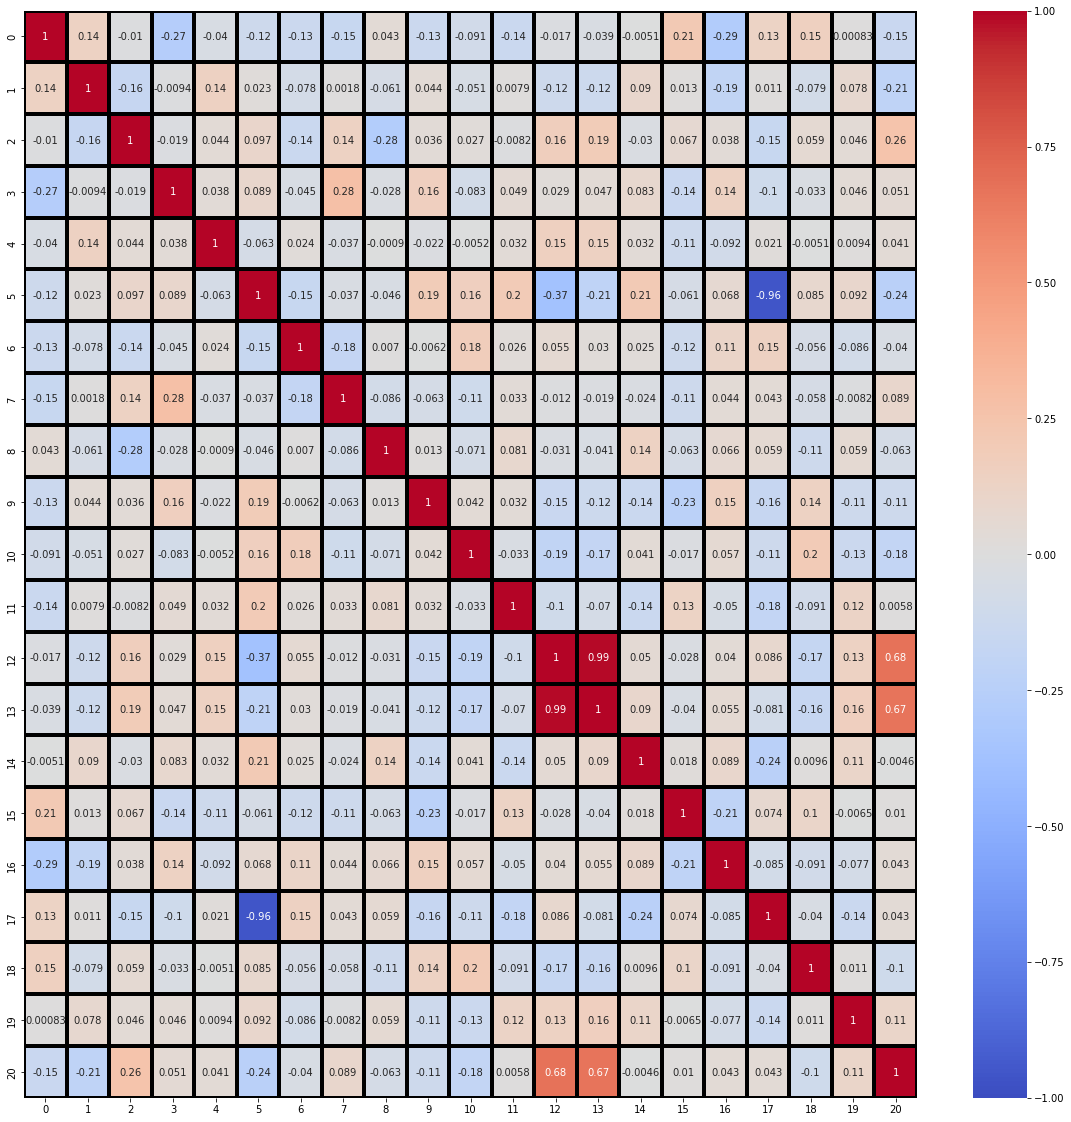

In [ ]:

corr_matrix = pd.DataFrame(X).corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, annot = True, vmin=-1, vmax=1, center=0, cmap= 'coolwarm', linewidths=3,linecolor='black', ax=ax)

По таблице корреляции видим, что есть сильная корреляция между парами признаков: 2 и 3, 2 и 16, 3 и 16, 15 и 20. Далее будем удалять 3, 16 признаки, чтобы убрать корреляции. 20 признак удалять нельзя, это целевой признак, и с ним должна быть сильная корреляция

In [ ]:

df = pd.DataFrame(X)
df = df.loc[:, (df.columns != 3) & (df.columns != 16)]
df.shape

(100, 19)

 Удалим низковариативные признаки

In [ ]:
df.shape
var = VarianceThreshold(threshold=1.)
df2 = var.fit_transform(df)
df2.shape

(100, 12)

Осталось  7 признаков

In [ ]:
df2 = pd.DataFrame(df2)
print(df2.head(1))

         0         1         2         3        4         5         6   \
0 -0.315236 -0.567724 -1.350907 -1.131756  0.96223  0.655287  2.078212   

         7         8         9         10        11  
0 -0.768726 -0.718562  0.319998  0.452271  1.669712  


целевой признак все равно удаляется функцией fit_transform, поэтому y берем из исходного фрейма. Поэтому принимаем для расчета метрики следующее:

In [ ]:
x = df2
y = df[[20]].values.ravel()

In [ ]:
cross_val_score(LogisticRegression(), x, y, scoring="accuracy").mean()

0.78

In [ ]:
Осуществите отбор признаков на основе дисперсионного анализа:

a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

b) Повторите п. 2 на отобранных признаках.

In [ ]:
y2 = y_data_generated
x2 = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y2)
print(x2.shape)
cross_val_score(LogisticRegression(), x2, y2, scoring="accuracy").mean()

(100, 5)


0.85

Отбор с использованием моделей:

a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [ ]:
y3 = y_data_generated
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(x_data_generated, y3)
model = SelectFromModel(lsvc, prefit=True)
x3 = model.transform(x_data_generated)
print(x3.shape)
cross_val_score(LogisticRegression(), x3, y3, scoring="accuracy").mean()

(100, 8)


0.8299999999999998

In [ ]:
y4 = y_data_generated
x4 = x_data_generated
clf = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=2, random_state=0, max_features=5)
clf.fit(x4, y4)
for i in range(20):
    print(f"{pd.DataFrame(x4).columns[i]}\t- {clf.feature_importances_[i]:.4f}")
x4 = pd.DataFrame(x_data_generated)[[15, 2, 3, 16, 10]]
cross_val_score(clf, x4, y4, scoring="accuracy").mean()

0	- 0.0219
1	- 0.0446
2	- 0.0440
3	- 0.0277
4	- 0.0398
5	- 0.0185
6	- 0.0085
7	- 0.0183
8	- 0.0223
9	- 0.0174
10	- 0.0326
11	- 0.0303
12	- 0.1737
13	- 0.3306
14	- 0.0498
15	- 0.0089
16	- 0.0273
17	- 0.0434
18	- 0.0131
19	- 0.0274


0.47000000000000003

Перебор признаков:

a) SequentialFeatureSelector.

b) Повторите п. 2 на отобранных признаках.

In [ ]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x_data_generated, y_data_generated)
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="forward"
).fit(x_data_generated, y_data_generated)
feature_names = np.array(pd.DataFrame(x_data_generated).columns)
names = feature_names[sfs_forward.get_support()]
print(names)
x5 = pd.DataFrame(x_data_generated)[[15, 16]]
y5 = y_data_generated
cross_val_score(LogisticRegression(), x5, y5, scoring="accuracy").mean()

[ 2 12]


0.44000000000000006

Сформулируйте выводы по проделанной работе:

a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [ ]:
sum_df = pd.DataFrame(columns=["способ выбора признаков", "кол-во признаков", "средняя точность модели"])

In [ ]:

sum_df.loc[len(sum_df)]=['без выбора', 20, 0.88]
sum_df.loc[len(sum_df)]=['удаление корреляций и низковариативных', 7, 0.91]
sum_df.loc[len(sum_df)]=['SelectKBest', 5, 0.93]
sum_df.loc[len(sum_df)]=['SelectFromModel', 3, 0.93]
sum_df.loc[len(sum_df)]=['RandomForestClassifier', 5, 0.87]

In [ ]:
sum_df.head(5)

,способ выбора признаков,кол-во признаков,средняя точность модели
0,без выбора,20,0.88
1,удаление корреляций и низковариативных,7,0.91
2,SelectKBest,5,0.93
3,SelectFromModel,3,0.93
4,RandomForestClassifier,5,0.87


Общий вывод:  работа с признаками может существенно повысить точность модели.


Добрый день, Алексей, спасибо за выполненную работу!
Всё отлично, спасибо за итоговую таблицу в конце решения, очень наглядно.
По этой теме рекомендую статью:
https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2
Зачёт, успехов в дальнейшем обучении!